## Convolutional Neural Network

### Importing the libraries

In [5]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [6]:
tf.__version__

'2.8.0'

### Part 1: DATA PREPROCESSING

    we will apply transformation the pictures to avoid overfitting but not on the test set,in simple what we will do is transform images like zooming,flipping etc..This process is called image augmentation

### Preprocessing the training set

In [10]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

training_set = train_datagen.flow_from_directory(
        "C:\\Users\\basav\\Desktop\\dataset\\training_set",
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 8000 images belonging to 2 classes.


### Preprocessing the test set

In [11]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
test_set = test_datagen.flow_from_directory(
        "C:\\Users\\basav\\Desktop\\dataset\\test_set",
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 2000 images belonging to 2 classes.


### Part 2: BUILDING THE CNN

### Initialising the CNN

In [14]:
cnn = tf.keras.models.Sequential()

### Step 1: Convolution

    we can experiment with layers

In [16]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation="relu",input_shape=[64,64,3]))


### Step 2: Pooling

    pool size is generally sujjested is 2 and stride will be 2 since
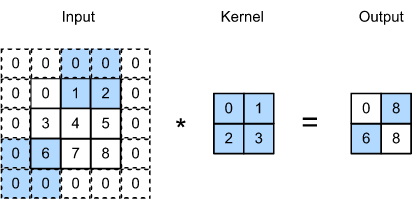

In [17]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

### Adding a second convolutional Layer

In [19]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation="relu"))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

### Step 3: Flattening

In [20]:
cnn.add(tf.keras.layers.Flatten())

### Step 4: Full Connection

In [21]:
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

### Step 5: Output Layer

    for multiclass the activation will be softmax

In [22]:
cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

### Part 3: TRAINING THE CNN

### Compiling the CNN

In [24]:
cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics = ['accuracy'])

### Training the CNN on the training set and evaluating on the test set

In [28]:
cnn.fit(x = training_set,validation_data = test_set,epochs=25)

Epoch 1/25
250/250 [==============================] - 447s 2s/step - loss: 0.6773 - accuracy: 0.5782 - val_loss: 0.6512 - val_accuracy: 0.5960
Epoch 2/25
250/250 [==============================] - 192s 768ms/step - loss: 0.6130 - accuracy: 0.6711 - val_loss: 0.5594 - val_accuracy: 0.7135
Epoch 3/25
250/250 [==============================] - 86s 344ms/step - loss: 0.5746 - accuracy: 0.7006 - val_loss: 0.6025 - val_accuracy: 0.6825
Epoch 4/25
250/250 [==============================] - 80s 319ms/step - loss: 0.5382 - accuracy: 0.7219 - val_loss: 0.5184 - val_accuracy: 0.7455
Epoch 5/25
250/250 [==============================] - 80s 321ms/step - loss: 0.5055 - accuracy: 0.7523 - val_loss: 0.4817 - val_accuracy: 0.7640
Epoch 6/25
250/250 [==============================] - 84s 336ms/step - loss: 0.4882 - accuracy: 0.7591 - val_loss: 0.6151 - val_accuracy: 0.7070
Epoch 7/25
250/250 [==============================] - 84s 334ms/step - loss: 0.4664 - accuracy: 0.7761 - val_loss: 0.4944 - val_acc

### Part 4: Making a single prediction

    we need to convert the PIL format into numpy array

In [49]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img("C:\\Users\\basav\\Desktop\\dataset\\single_prediction\\cat_or_dog_7.jpg",target_size=[64,64])
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0]==1:
    prediction = 'Dog'
else:
    prediction = 'Cat'

In [50]:
print(prediction)

Cat
